In [36]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil
from sklearn.preprocessing import MinMaxScaler

# Server Stats Data Processing

In [37]:
# Import cpu load dataset
cpu_df = pd.read_csv("data/Log Report.csv", encoding='utf-8')

# Rename columns to remove spaces and symbols
cpu_df.rename(columns={'Collection Time': 'Date', 'CPU (%)': 'CPU', 'Memory (%)': 'Memory', 'Disk Used (%)': 'Disk_Used'}, inplace=True)

# Remove unneeded columns
cpu_df.drop(['Disk_Used', 'Reason', 'Status', 'Memory'], axis=1, inplace=True)

# define a 'real' time zone for each abbreviation:
tzmapping = {'PDT': dateutil.tz.gettz('America/Los_Angeles'),
             'PST': dateutil.tz.gettz('America/Los_Angeles')}

# convert date to datetime
cpu_df['Date'] = pd.to_datetime(cpu_df['Date'])
# cpu_df['Date'] = cpu_df['Date'].apply(dateutil.parser.parse, tzinfos=tzmapping)

# Set date to index
cpu_df = cpu_df.set_index('Date')
cpu_df.head()

C:\Users\adamw\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,CPU
Date,
2022-05-11 23:59:34,7.00
2022-05-11 23:58:32,7.13
2022-05-11 23:57:32,7.00
2022-05-11 23:56:32,6.63
2022-05-11 23:55:32,7.00


# Sales Data Processing

### SQL Query for sales data
```
DECLARE @day DATETIME = '2022-05-03'

SELECT dateadd(minute,(datediff(minute,0,SaleDate)/1)*1,0) Date, COUNT(*) Sales
FROM dbo.TerminalSales
WHERE SaleDate BETWEEN @day AND DATEADD(DAY,1,@day)
AND SaleType = 0
GROUP BY dateadd(minute,(datediff(minute,0,SaleDate)/1)*1,0)
ORDER BY dateadd(minute,(datediff(minute,0,SaleDate)/1)*1,0)
```

In [39]:
# Import sales data
sales_df = pd.read_csv("data/sales.csv", encoding='utf-8')

# convert date to datetime
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# Set date as index
sales_df.set_index("Date",inplace=True)
sales_df.head()

,Sales
Date,
2022-04-26 07:25:00,1
2022-04-26 08:36:00,2
2022-04-26 08:39:00,1
2022-04-26 08:54:00,1
2022-04-26 09:08:00,1


# Scaling

In [40]:
# Create new dataframes for scaling
scaled_cpu_df = cpu_df
scaled_sales_df = sales_df

# Scale our dataframes to make the view more friendly
scaler = MinMaxScaler()
scaled_cpu_df['CPU'] = scaler.fit_transform(scaled_cpu_df['CPU'].values.reshape(-1,1))
scaled_sales_df['Sales'] = scaler.fit_transform(scaled_sales_df['Sales'].values.reshape(-1,1))

C:\Users\adamw\AppData\Local\Temp/ipykernel_8948/2492893662.py:13: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  scaled_cpu_df[day].plot(ax=axes[row], figsize=(50,200), color='tab:blue')
C:\Users\adamw\AppData\Local\Temp/ipykernel_8948/2492893662.py:14: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  scaled_sales_df[day].plot(ax=axes[row], color='seagreen')
C:\Users\adamw\AppData\Local\Temp/ipykernel_8948/2492893662.py:13: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  scaled_cpu_df[day].plo

C:\Users\adamw\AppData\Local\Temp/ipykernel_8948/2492893662.py:14: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  scaled_sales_df[day].plot(ax=axes[row], color='seagreen')
C:\Users\adamw\AppData\Local\Temp/ipykernel_8948/2492893662.py:13: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  scaled_cpu_df[day].plot(ax=axes[row], figsize=(50,200), color='tab:blue')
C:\Users\adamw\AppData\Local\Temp/ipykernel_8948/2492893662.py:14: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  scaled_sales_df[day].p

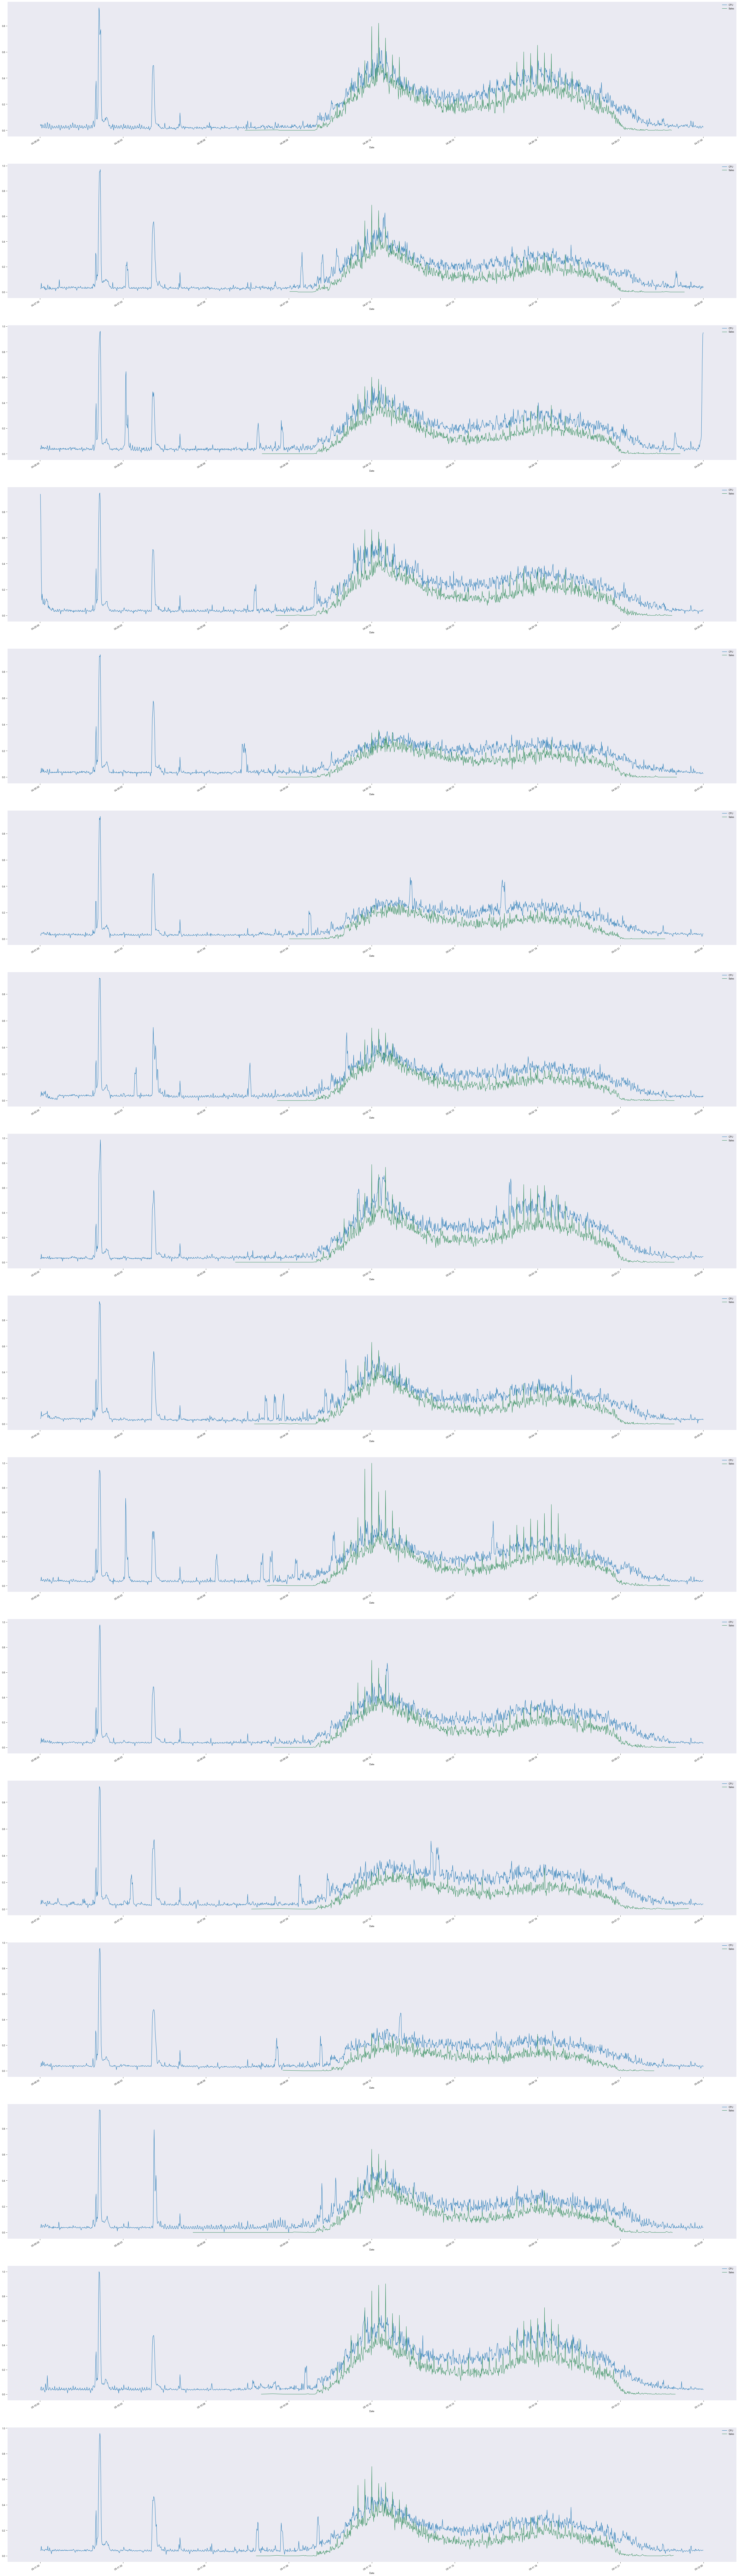

In [50]:
from matplotlib import style
import seaborn as sns
style.use('seaborn-dark')
sns.set_context("paper")

unique_days = list(set(scaled_cpu_df.index.to_period('D').strftime('%Y-%m-%d')))
unique_days.sort()

fig, axes = plt.subplots(nrows=len(unique_days), ncols=1)

row = 0
for day in unique_days:
    scaled_cpu_df[day].plot(ax=axes[row], figsize=(50,200), color='tab:blue')
    scaled_sales_df[day].plot(ax=axes[row], color='seagreen')
    row += 1

plt.savefig('images/days.png')
plt.show()